In [1]:
!pip install matplotlib seaborn numpy pandas scipy scikit-learn xgboost --user

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, OrdinalEncoder


# Ensure inline plotting for Jupyter Notebook
%matplotlib inline


In [3]:
# load the dataset
data = pd.read_csv(r"C:\Users\hp\hair-fall-prediction\Predict Hair Fall.csv")

# check the dimension of the dataset
num_row, num_col = data.shape
print('The dataset contains {} rows and {} columns.'.format(num_row, num_col))

# check the attributes in the dataset
attributes = list(data.columns)
print('\nAttributes in the dataset: ', ', '.join(attributes))

# view the first 5 rows of the dataset
data.head()

The dataset contains 999 rows and 13 columns.

Attributes in the dataset:  Id, Genetics, Hormonal Changes, Medical Conditions, Medications & Treatments, Nutritional Deficiencies , Stress, Age, Poor Hair Care Habits , Environmental Factors, Smoking, Weight Loss , Hair Loss


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [5]:
binaryVar = ['Genetics','Hormonal Changes','Poor Hair Care Habits','Environmental Factors','Smoking','Weight Loss']
categoricalVar = ['Medical Conditions','Medications & Treatments','Nutritional Deficiencies']
ordinalVar = ['Stress']
continuousVar = ['Age']

In [6]:
data.drop(columns=['Id'], axis=1, inplace=True)

colNames = [col.strip() for col in data.columns]
data.columns = colNames

data.replace({'No Data': np.nan}, inplace=True)

desired_order_map = {'Low':0, 'Moderate':1, 'High':2}
data['Stress'] = data['Stress'].map(desired_order_map)

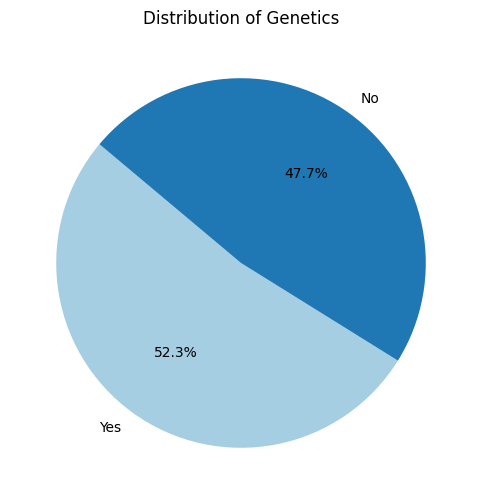

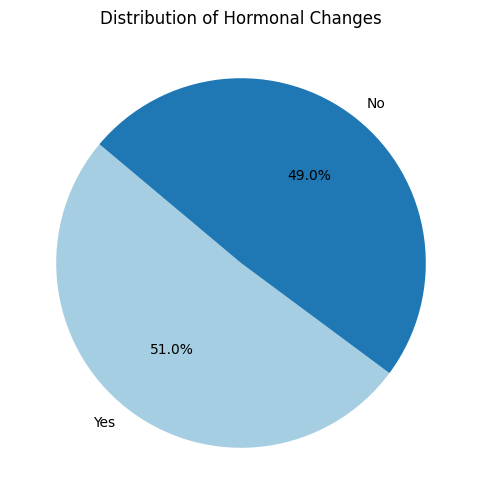

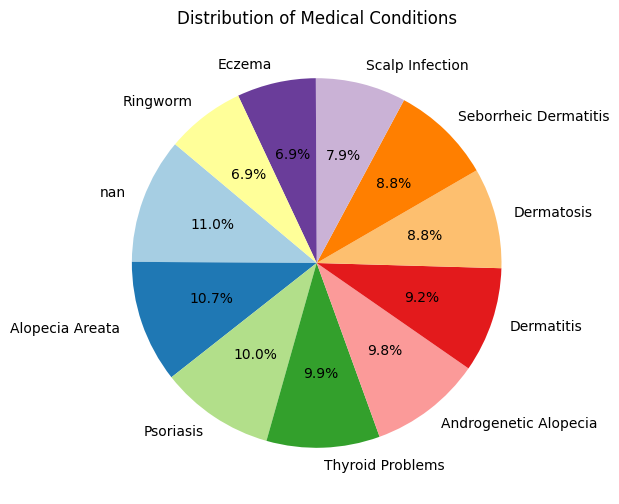

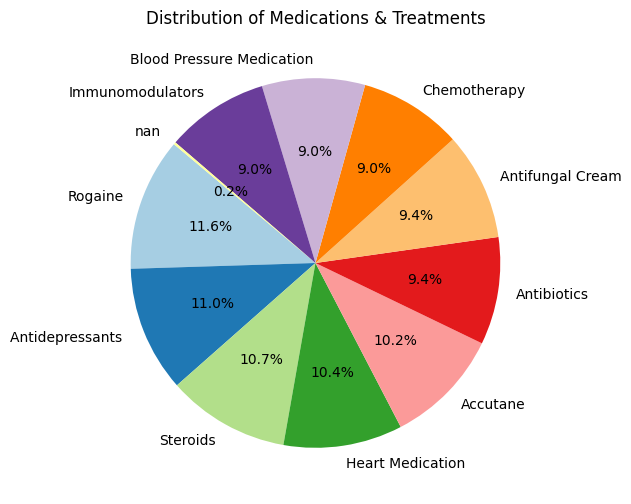

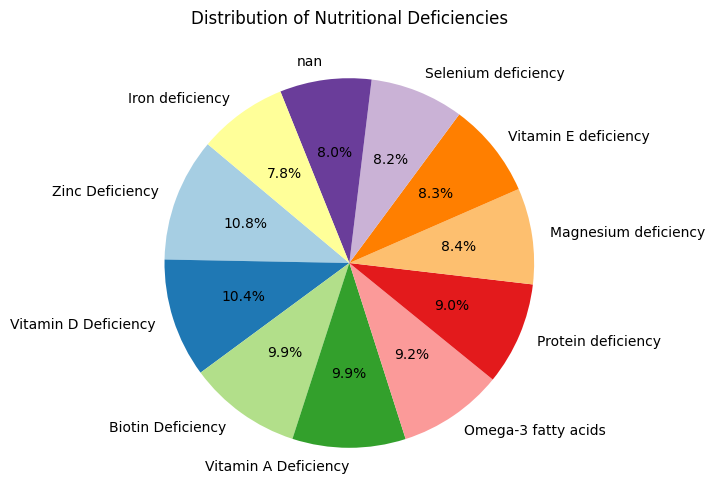

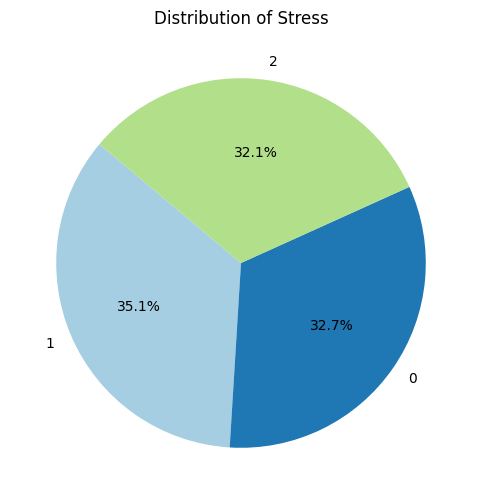

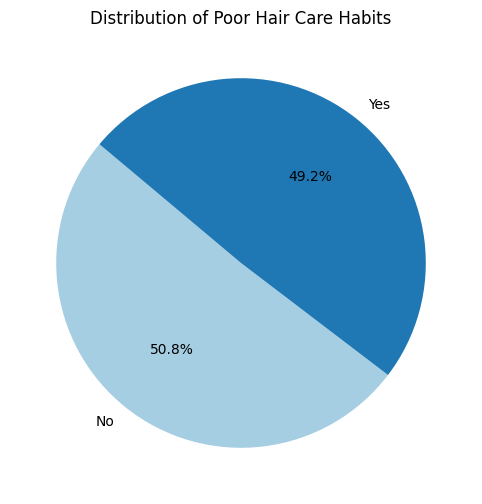

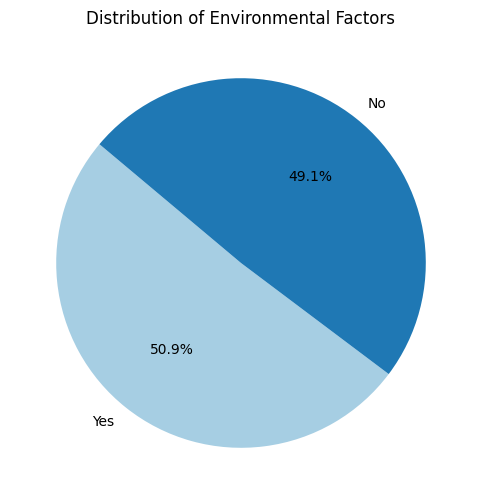

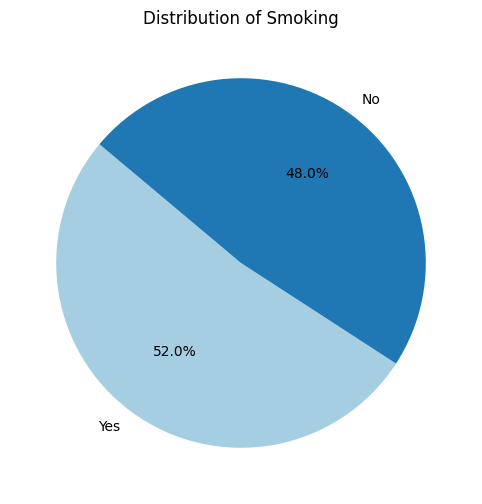

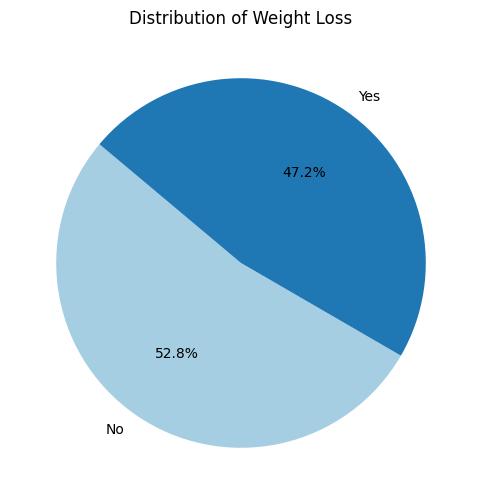

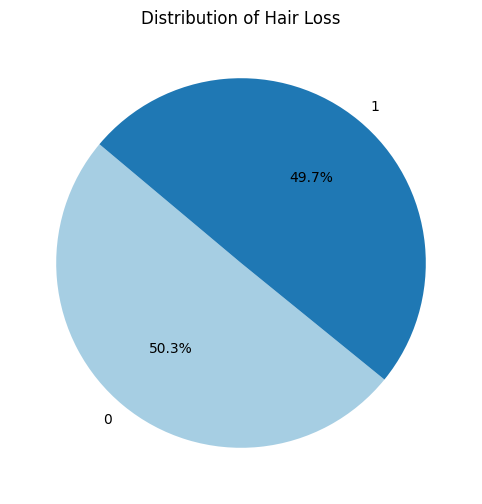

In [7]:
categorical_columns = ['Genetics', 'Hormonal Changes', 'Medical Conditions', 
                       'Medications & Treatments', 'Nutritional Deficiencies', 
                       'Stress', 'Poor Hair Care Habits', 'Environmental Factors', 
                       'Smoking', 'Weight Loss', 'Hair Loss']

# Function to plot pie chart for each categorical column
def plot_pie_chart(data, column):
    values = data[column].value_counts(dropna=False)
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot pie charts for each categorical column
for column in categorical_columns:
    if column in data.columns:
        plot_pie_chart(data, column)
    else:
        print(f"Warning: Column '{column}' not found in the dataset.")

In [8]:
train, test = train_test_split(data, test_size=0.2, stratify=data['Hair Loss'], shuffle=True, random_state=122)

print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

Dimension of training dataset:  (799, 12)
Dimension of test dataset:  (200, 12)


In [9]:
Xtrain = train.drop(columns=['Hair Loss'], axis=1)
ytrain = train['Hair Loss']

Xtest = test.drop(columns=['Hair Loss'], axis=1)
ytest = test['Hair Loss']

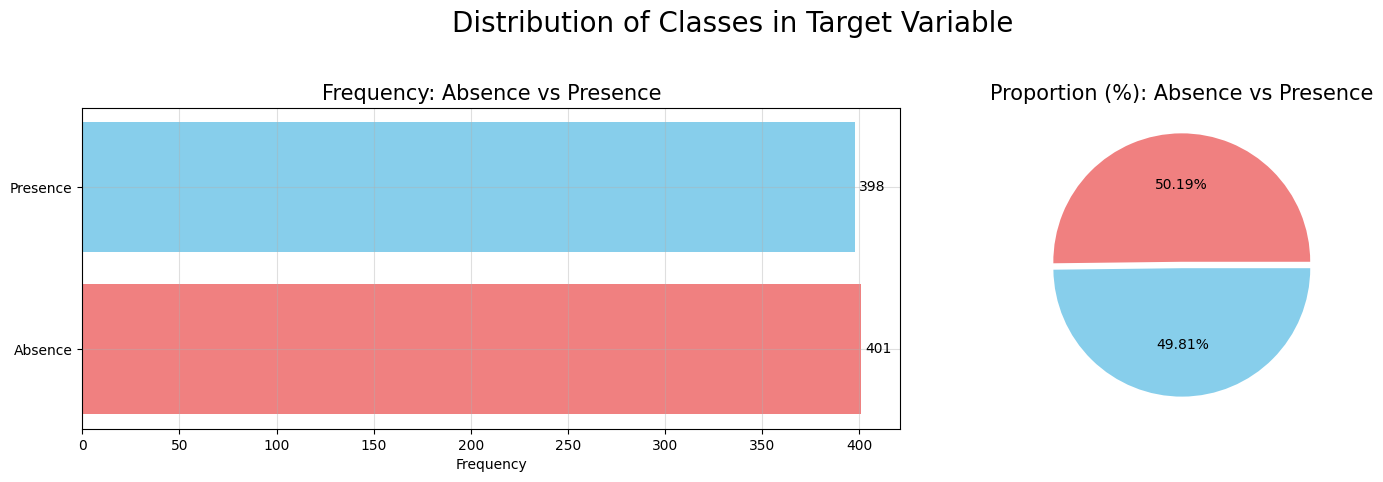

In [10]:
target = ytrain.value_counts()

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=['Absence','Presence'], width=target.values, color=['lightcoral','skyblue'])
axes[0].grid(alpha=0.4)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Frequency: Absence vs Presence', fontsize=15)

for index, values in enumerate(target):
    axes[0].text(values+2, index, str(values), va='center')

axes[1].pie(target.values, autopct='%.2f%%', explode=[0.05,0], colors=['lightcoral','skyblue'])
axes[1].set_title('Proportion (%): Absence vs Presence', fontsize=15)

figure.suptitle('Distribution of Classes in Target Variable', fontsize=20)
plt.tight_layout(pad=2)
plt.show()


In [11]:
colNames = Xtrain.columns

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Xtrain_imputed = imp.fit_transform(Xtrain)               
Xtrain = pd.DataFrame(Xtrain_imputed, columns=colNames) 

Xtest_imputed = imp.transform(Xtest)                     
Xtest = pd.DataFrame(Xtest_imputed, columns=colNames)     

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# perform ordinal encoding to variable 'stress'
ordinal_encoder = OrdinalEncoder()
stress_train_encoded = ordinal_encoder.fit_transform(Xtrain['Stress'].to_frame())
stress_test_encoded = ordinal_encoder.transform(Xtest['Stress'].to_frame())

In [13]:
def onehotencoding(features, train, test):
    training_list = []
    test_list = []

    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    for feat in features:
        if feat not in train.columns:
            print(f"Warning: Feature '{feat}' not found in the dataset.")
            continue

        encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

        feat_train_encoded = encoder.fit_transform(train[feat].to_frame())
        feat_train_df = pd.DataFrame(feat_train_encoded, columns=encoder.get_feature_names_out())

        feat_test_encoded = encoder.transform(test[feat].to_frame())
        feat_test_df = pd.DataFrame(feat_test_encoded, columns=encoder.get_feature_names_out())

        training_list.append(feat_train_df)
        test_list.append(feat_test_df)

    return training_list, test_list


In [14]:
onehot_features = binaryVar + categoricalVar

# Define the onehotencoding function
def onehotencoding(features, train, test):
    encoded_train = []
    encoded_test = []
    
    for feat in features:
        if train[feat].nunique() == 1:  # Skip features with only one unique value in training set
            continue
        
        # Create OneHotEncoder object
        encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
        
        # Fit and transform the training data
        feat_train_encoded = encoder.fit_transform(train[[feat]])
        feat_train_encoded_df = pd.DataFrame(feat_train_encoded, columns=encoder.get_feature_names_out([feat]))
        encoded_train.append(feat_train_encoded_df)
        
        # Transform the test data
        feat_test_encoded = encoder.transform(test[[feat]])
        feat_test_encoded_df = pd.DataFrame(feat_test_encoded, columns=encoder.get_feature_names_out([feat]))
        encoded_test.append(feat_test_encoded_df)
    
    return encoded_train, encoded_test

# Encode the categorical features in train and test dataset
oh_encoded_features = onehotencoding(onehot_features, Xtrain, Xtest)

# Convert the encoded training and test data into dataframes
oh_encoded_train = oh_encoded_features[0]
Xtrain_processed = pd.concat(oh_encoded_train, axis=1)
Xtrain_processed['Stress'] = stress_train_encoded
Xtrain_processed['Age'] = Xtrain['Age']

oh_encoded_test = oh_encoded_features[1]
Xtest_processed = pd.concat(oh_encoded_test, axis=1)
Xtest_processed['Stress'] = stress_test_encoded
Xtest_processed['Age'] = Xtest['Age']


In [15]:

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_processed)
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=Xtrain_processed.columns)

Xtest_scaled = scaler.transform(Xtest_processed)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtrain_processed.columns)

In [16]:
def modelPerformance(Xtrain, ytrain, Xtest, ytest, model):
    # predict classes
    ypred_train = model.predict(Xtrain)
    ypred_test = model.predict(Xtest)

    # predict class probabilities
    ypred_train_proba = model.predict_proba(Xtrain)
    ypred_test_proba = model.predict_proba(Xtest)

    labels = ['Absence','Presence']

    # classification report
    report_train = classification_report(ytrain, ypred_train, target_names=labels)
    print('Classification Report - Training Data: ')
    print(report_train)

    report_test = classification_report(ytest, ypred_test, target_names=labels)
    print('ClassificationReport - Test Data: ')
    print(report_test)

    # ROC curve
    fpr_train, tpr_train, _ = roc_curve(ytrain, ypred_train_proba[:,1])
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(ytest, ypred_test_proba[:,1])
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='indigo', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='indianred', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
    plt.legend(loc='lower right')
    plt.show()

    # confusion matrix
    cm_train = confusion_matrix(ytrain, ypred_train, normalize='true')
    cm_test = confusion_matrix(ytest, ypred_test, normalize='true')

    figure, axes = plt.subplots(1,2, figsize=(13,5))
    sns.heatmap(cm_train, annot=True, xticklabels=labels, yticklabels=labels, cmap='BuPu', cbar=False, ax=axes[0])
    axes[0].set_title('Training', fontsize=15)
    sns.heatmap(cm_test, annot=True, xticklabels=labels, yticklabels=labels, cmap='BuPu', cbar=False, ax=axes[1])
    axes[1].set_title('Test', fontsize=15)
    figure.suptitle('Confusion Matrix', fontsize=20)
    plt.tight_layout(pad=2)
    plt.show()

In [17]:
tree = DecisionTreeClassifier(random_state=122)

# fitted the tree model with training data
tree.fit(Xtrain_scaled, ytrain)


DecisionTreeClassifier(random_state=122)

In [18]:
def modelPerformance(Xtrain, ytrain, Xtest, ytest, model):
    # Fit the model
    model.fit(Xtrain, ytrain)
    
    # Predict on the training set
    ypred_train = model.predict(Xtrain)
    
    # Predict on the test set
    ypred_test = model.predict(Xtest)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(ytrain, ypred_train)
    test_accuracy = accuracy_score(ytest, ypred_test)
    
    # Print accuracy and classification report
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}')
    print("\nClassification Report (Test Set):")
    print(classification_report(ytest, ypred_test))
    
    return train_accuracy, test_accuracy

tree = DecisionTreeClassifier()

modelPerformance(Xtrain_scaled, ytrain, Xtest_scaled, ytest, tree)


Train Accuracy: 1.0
Test Accuracy: 0.48

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       101
           1       0.47      0.47      0.47        99

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



(1.0, 0.48)

Train Accuracy: 1.0
Test Accuracy: 0.49

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       101
           1       0.48      0.44      0.46        99

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



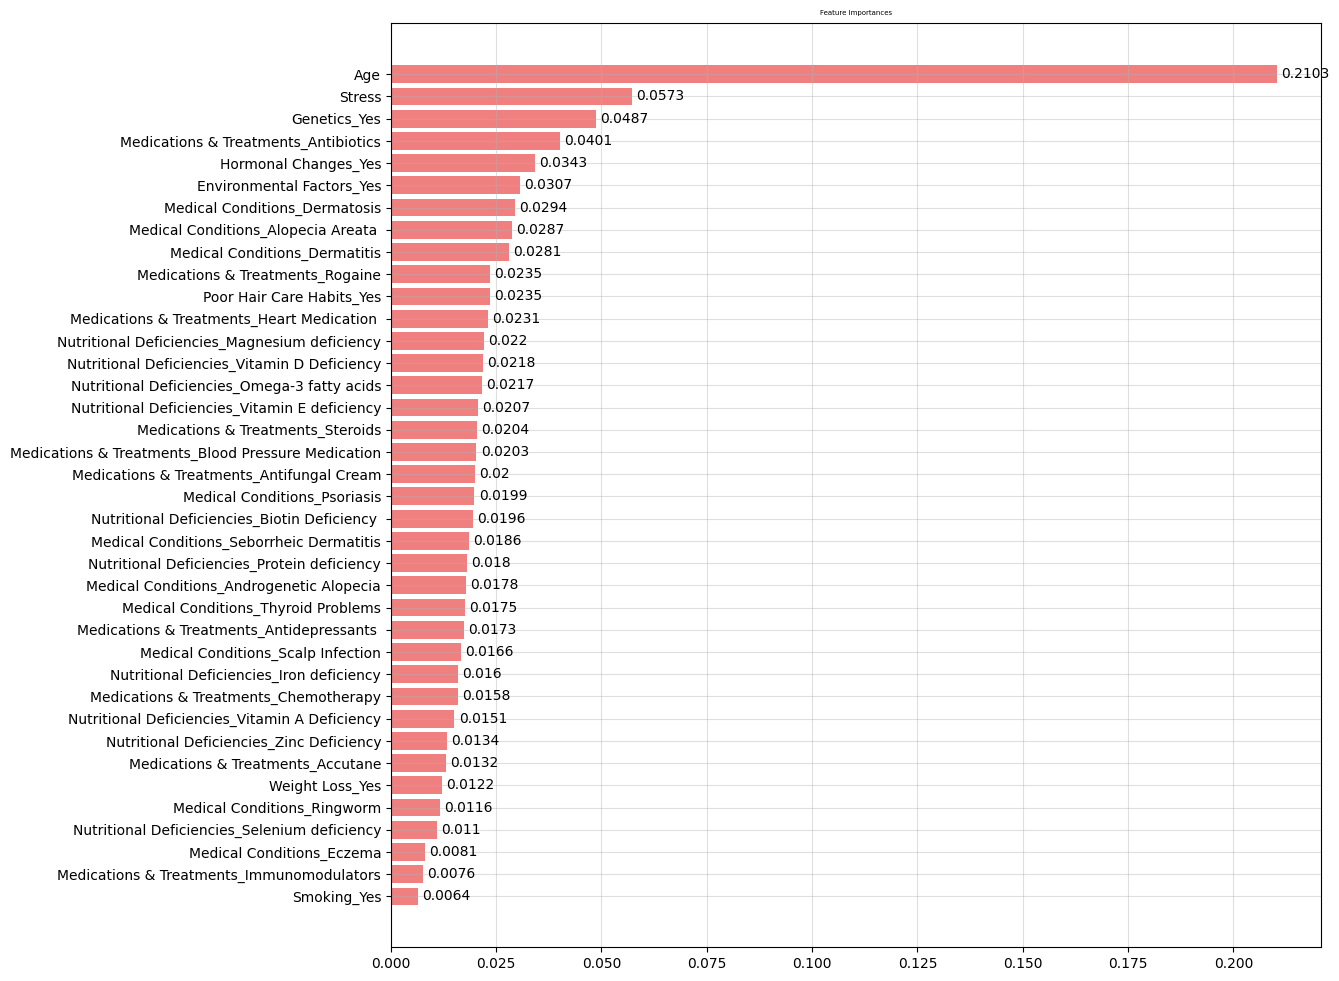

In [19]:
def modelPerformance(Xtrain, ytrain, Xtest, ytest, model):
    # Fit the model
    model.fit(Xtrain, ytrain)

    ypred_train = model.predict(Xtrain)
  
    ypred_test = model.predict(Xtest)

    train_accuracy = accuracy_score(ytrain, ypred_train)
    test_accuracy = accuracy_score(ytest, ypred_test)
    
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}')
    print("\nClassification Report (Test Set):")
    print(classification_report(ytest, ypred_test))
    
    return model

tree = DecisionTreeClassifier()

fitted_model = modelPerformance(Xtrain_scaled, ytrain, Xtest_scaled, ytest, tree)

featureImportances = fitted_model.feature_importances_

feature_names = Xtrain_scaled.columns

feat_imp = pd.Series(featureImportances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(12, 12))
plt.barh(y=feat_imp.index, width=feat_imp.values, color='lightcoral')

for index, value in enumerate(feat_imp):
    plt.text(value + 0.001, index, str(round(value, 4)), va='center')

plt.grid(alpha=0.4)
plt.title('Feature Importances', fontsize=5)
plt.show()


In [20]:
selected_feats = list(feat_imp[feat_imp.values > 0.08].index)

In [21]:
tree_base = DecisionTreeClassifier(random_state=122)

tree_base.fit(Xtrain_scaled[selected_feats], ytrain)

DecisionTreeClassifier(random_state=122)

In [22]:
modelPerformance(Xtrain_scaled[selected_feats], ytrain, Xtest_scaled[selected_feats], ytest, tree_base)

Train Accuracy: 0.5857321652065082
Test Accuracy: 0.515

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       101
           1       0.51      0.40      0.45        99

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



DecisionTreeClassifier(random_state=122)

In [23]:
tree = DecisionTreeClassifier(random_state=122)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search_tree.fit(Xtrain_scaled[selected_feats], ytrain)

print('Best Parameters: ', grid_search_tree.best_params_)
print('Best AUROC: ', grid_search_tree.best_score_)

tree_tuned = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best AUROC:  0.5364428108884202


In [24]:
modelPerformance(Xtrain_scaled[selected_feats], ytrain, Xtest_scaled[selected_feats], ytest, tree_tuned)

Train Accuracy: 0.5682102628285357
Test Accuracy: 0.515

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.52      0.67      0.58       101
           1       0.51      0.35      0.42        99

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.52      0.50       200



DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=122,
                       splitter='random')

In [43]:
SEED=42
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
SEED = 42

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Scale the data
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)
param_grid = {
    "Logistic Regression": {
        'model': LogisticRegression(random_state=SEED),
        'params': {'C': [0.1, 1, 10]}
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    },
    "Support Vector Classifier": {
        'model': SVC(probability=True, random_state=SEED),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(random_state=SEED),
        'params': {'max_depth': [None, 10, 20, 30]}
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=SEED),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    },
    "XGBoost": {
        'model': XGBClassifier(random_state=SEED),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
    }
}

results = {}
best_estimators = {}
confusion_matrices = {}

# Perform GridSearchCV for each model
for model_name, config in param_grid.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_prep, y_train)

    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(X_test_prep)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test, output_dict=True)

    results[model_name] = {
        "Test Accuracy": test_accuracy,
        "Precision": class_report['weighted avg']['precision'],
        "Recall": class_report['weighted avg']['recall'],
        "F1-Score": class_report['weighted avg']['f1-score'],
        "Best Params": grid_search.best_params_
    }
    best_estimators[model_name] = best_model

    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred_test)

# Stacking Classifier
base_learners = [(name, model) for name, model in best_estimators.items()]
final_estimator = LogisticRegression(random_state=SEED)
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=5)
stacking_clf.fit(X_train_prep, y_train)

y_pred_test_stack = stacking_clf.predict(X_test_prep)
test_accuracy_stack = accuracy_score(y_test, y_pred_test_stack)
class_report_stack = classification_report(y_test, y_pred_test_stack, output_dict=True)

results["Stacking Classifier"] = {
    "Test Accuracy": test_accuracy_stack,
    "Precision": class_report_stack['weighted avg']['precision'],
    "Recall": class_report_stack['weighted avg']['recall'],
    "F1-Score": class_report_stack['weighted avg']['f1-score'],
    "Best Params": "N/A"
}

confusion_matrices["Stacking Classifier"] = confusion_matrix(y_test, y_pred_test_stack)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)



                          Test Accuracy Precision Recall  F1-Score  \
Logistic Regression                0.55   0.56875   0.55  0.546617   
K-Nearest Neighbors                 0.5      0.54    0.5   0.46875   
Support Vector Classifier           0.5  0.521978    0.5  0.489899   
Decision Tree                       0.5  0.510101    0.5       0.5   
Random Forest                      0.45   0.44375   0.45   0.44578   
XGBoost                            0.75      0.75   0.75  0.748082   
Stacking Classifier                 0.5       0.5    0.5       0.5   

                                                          Best Params  
Logistic Regression                                        {'C': 0.1}  
K-Nearest Neighbors                                {'n_neighbors': 7}  
Support Vector Classifier              {'C': 0.1, 'kernel': 'linear'}  
Decision Tree                                     {'max_depth': None}  
Random Forest                  {'max_depth': 10, 'n_estimators': 100}  
XGBoost

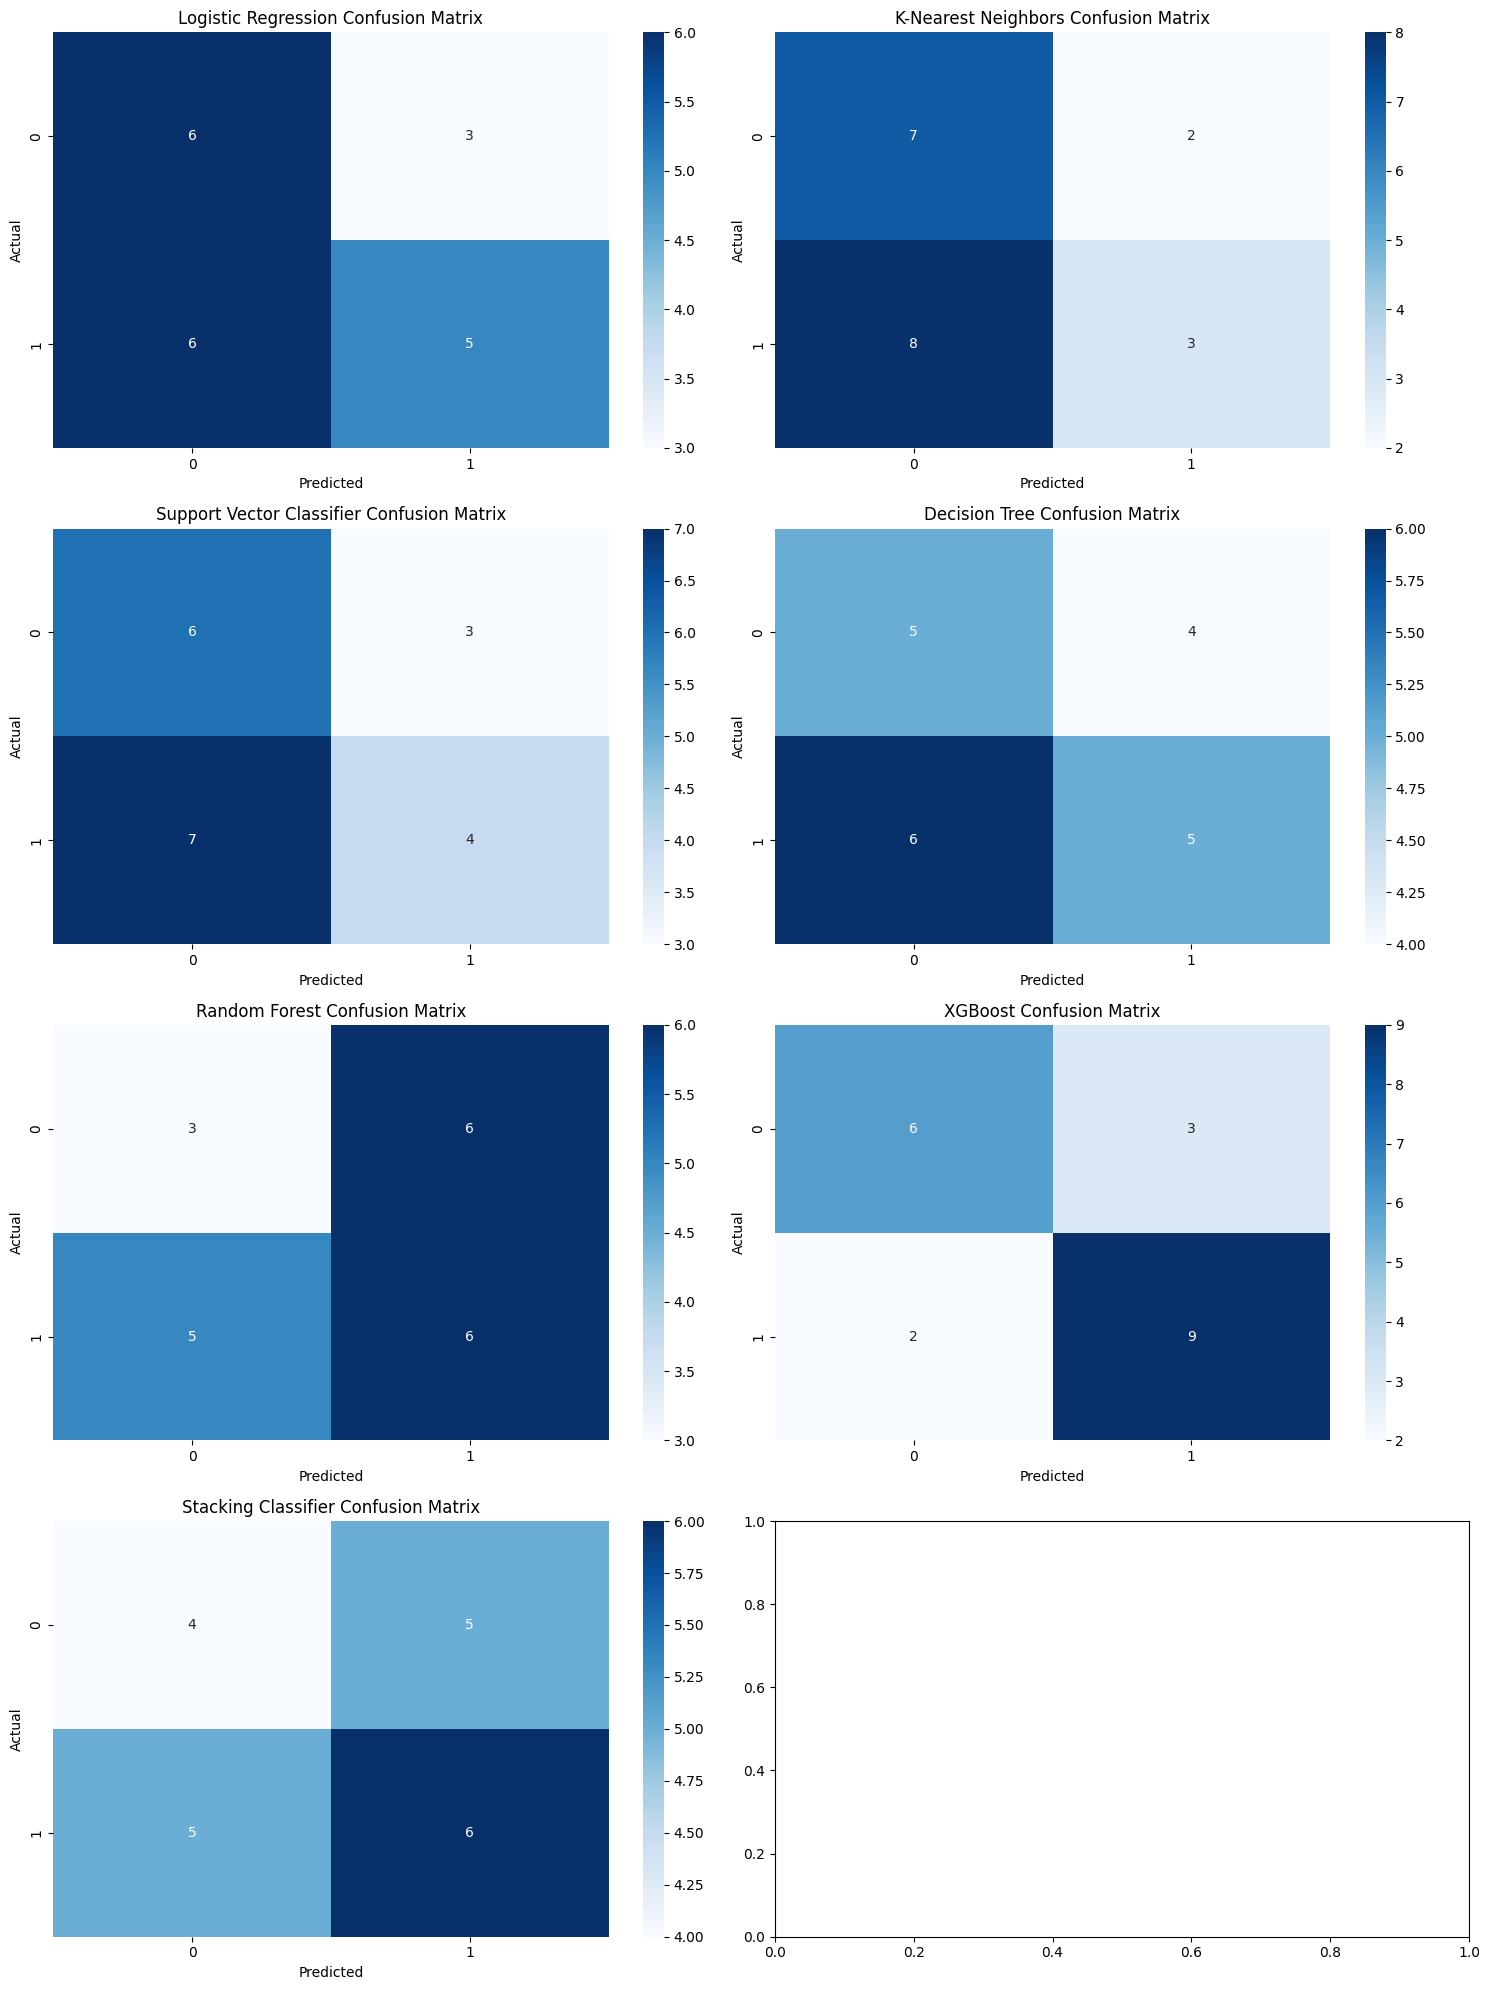

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [45]:

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Test Accuracy: {metrics['Test Accuracy']}")
    print(f"  Best Params: {metrics['Best Params']}")
    print()

best_model_name = max(results, key=lambda x: results[x]["Test Accuracy"])
best_model_accuracy = results[best_model_name]["Test Accuracy"]
print(f"The best model is {best_model_name} with a Test Accuracy of {best_model_accuracy}")

Logistic Regression:
  Test Accuracy: 0.55
  Best Params: {'C': 0.1}

K-Nearest Neighbors:
  Test Accuracy: 0.5
  Best Params: {'n_neighbors': 7}

Support Vector Classifier:
  Test Accuracy: 0.5
  Best Params: {'C': 0.1, 'kernel': 'linear'}

Decision Tree:
  Test Accuracy: 0.5
  Best Params: {'max_depth': None}

Random Forest:
  Test Accuracy: 0.45
  Best Params: {'max_depth': 10, 'n_estimators': 100}

XGBoost:
  Test Accuracy: 0.75
  Best Params: {'learning_rate': 0.1, 'n_estimators': 50}

Stacking Classifier:
  Test Accuracy: 0.5
  Best Params: N/A

The best model is XGBoost with a Test Accuracy of 0.75
